In [ ]:
# Create the .kaggle directory

!pip install kaggle
!mkdir -p ~/.kaggle


from google.colab import files
files.upload()

# To Copy the uploaded kaggle.json file to the correct location

!cp kaggle.json ~/.kaggle/

# Set secure permissions for API to work

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vivek468/superstore-dataset-final
!unzip superstore-dataset-final.zip



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 1.62GB/s]
Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [ ]:
# Import required libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Explore the Dataset
# To correctly decode the dataset we need to specificly add different encoding format

df = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')

# Retriving the coloumn names

df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#First and last 5 rows of the dataset

df.head()
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
# Total no. of rows and columns of the dataset

df.shape

(9994, 21)

In [ ]:
# Statistical Measures of the dataset

df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Find any missing or null values in the dataset

if df.isnull().any().any():
  print("There are missing or null values in the data set")
else:
  print("There are no missing or null values in the data set")

There are no missing or null values in the data set


In [ ]:
# Find any duplicate values

if df.duplicated().any():
  print("There are duplicate values in the data set")
else:
  print("There are no duplicate values in the data set")

There are no duplicate values in the data set


In [ ]:
# Check the retail store data whether it is completey based on USA or not

countries = df['Country'].unique()
if countries != "United States" :
  print("Countries in the data:\n", countries)
else:
  print("This data only based on USA retail stores.")

This data only based on USA retail stores.


In [ ]:
# Categories and subcategories of the store products

categories_list = df.groupby('Category')['Sub-Category'].unique()
print(categories_list)

Category
Furniture                   [Bookcases, Chairs, Tables, Furnishings]
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Pa...
Technology                  [Phones, Accessories, Machines, Copiers]
Name: Sub-Category, dtype: object


             Sales    Profit  Discount  Quantity
Sales     1.000000  0.479064 -0.028190  0.200795
Profit    0.479064  1.000000 -0.219487  0.066253
Discount -0.028190 -0.219487  1.000000  0.008623
Quantity  0.200795  0.066253  0.008623  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

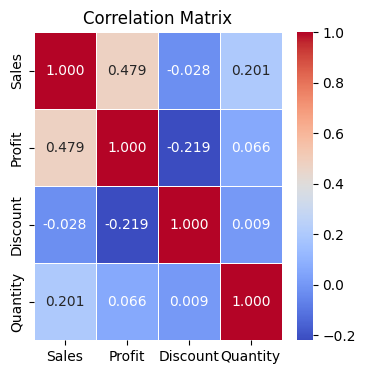

In [ ]:
# Inorder to find the top 5 profitable products in each regions
# Find the relationship between multiple numerical varibles using heatmap and correlation matrix


data_to_correlate = df[[ 'Sales', 'Profit', 'Discount', 'Quantity']]
correlation_matrix = data_to_correlate.corr()
print(correlation_matrix)

plt.figure(figsize =(4,4))
sns.heatmap(correlation_matrix,
            annot=True,     # Show the correlation value numbers on the map
            cmap='coolwarm', # A color scheme
            fmt=".3f",      # Format numbers to three decimal places
            linewidths=.5,  # Add lines between cells
            cbar=True)      # Show the color bar
plt.title("Correlation Matrix")

<Figure size 400x400 with 0 Axes>

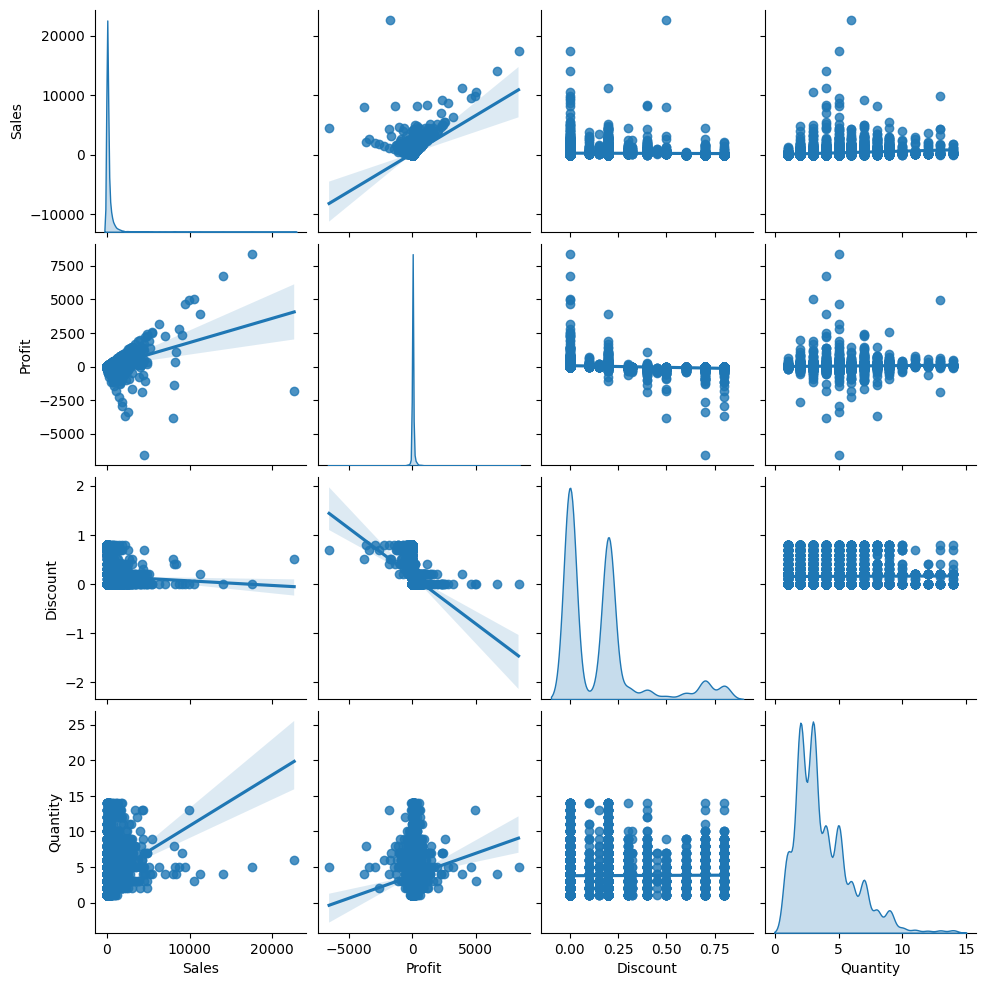

In [ ]:
# Find the relationship between multiple numerical varibles using pairplot
plt.figure(figsize =(4,4))
sns.pairplot(data_to_correlate,
             diag_kind= "kde",
             kind = "reg",
             height = 2.5)

In [ ]:
# Group categorical variables and Sum numerical variables
product_per_region = df.groupby(['Region', 'Category', 'Product Name'])[['Sales', 'Profit', 'Discount', 'Quantity']].sum()
print(product_per_region)

                                                                          Sales  \
Region  Category   Product Name                                                   
Central Furniture  12-1/2 Diameter Round Wall Clock                      87.912   
                   36X48 HARDFLOOR CHAIRMAT                              41.960   
                   3M Hangers With Command Adhesive                       2.960   
                   3M Polarizing Light Filter Sleeves                    59.680   
                   3M Polarizing Task Lamp with Clamp Arm, Light Gray  1095.840   
...                                                                         ...   
West    Technology iKross Bluetooth Portable Keyboard + Cell Phone...   100.560   
                   iOttie HLCRIO102 Car Mount                            31.984   
                   iOttie XL Car Mount                                   79.960   
                   invisibleSHIELD by ZAGG Smudge-Free Screen Prot...   158.312   
    

In [ ]:
# Top five profitable products per region using sort and groupby method
top5_profit_per_region = product_per_region.sort_values(['Region', 'Profit'], ascending= [True, False]). groupby('Region').head(5)
print(top5_profit_per_region)

                                                                                Sales  \
Region  Category        Product Name                                                    
Central Technology      Canon imageCLASS 2200 Advanced Copier               17499.950   
        Office Supplies GBC Ibimaster 500 Manual ProClick Binding System    10653.720   
        Technology      Canon PC1060 Personal Laser Copier                   4899.930   
        Office Supplies Ibico EPK-21 Electric Binding System                11339.940   
                        Honeywell Enviracaire Portable HEPA Air Cleaner...   3908.450   
East    Technology      Canon imageCLASS 2200 Advanced Copier               30099.914   
                        Ativa V4110MDD Micro-Cut Shredder                    7699.890   
                        3D Systems Cube Printer, 2nd Generation, Magenta    14299.890   
                        Zebra ZM400 Thermal Label Printer                    6965.700   
                     

In [ ]:
# Average discount given on these most profitable products using aggregation method
disc_on_top5_profit = top5_profit_per_region.groupby(['Region', 'Product Name']).agg({
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

print(disc_on_top5_profit)

     Region                                       Product Name  Discount  \
0   Central                 Canon PC1060 Personal Laser Copier       0.0   
1   Central              Canon imageCLASS 2200 Advanced Copier       0.0   
2   Central   GBC Ibimaster 500 Manual ProClick Binding System       0.8   
3   Central  Honeywell Enviracaire Portable HEPA Air Cleane...       0.0   
4   Central               Ibico EPK-21 Electric Binding System       0.8   
5      East   3D Systems Cube Printer, 2nd Generation, Magenta       0.0   
6      East                  Ativa V4110MDD Micro-Cut Shredder       0.0   
7      East              Canon imageCLASS 2200 Advanced Copier       0.6   
8      East               Hewlett Packard LaserJet 3310 Copier       0.8   
9      East                  Zebra ZM400 Thermal Label Printer       0.0   
10    South                 Cisco 9971 IP Video Phone Charcoal       0.0   
11    South  Fellowes PB500 Electric Punch Plastic Comb Bin...       0.0   
12    South 

In [ ]:
# Top 5 loss-making products per region using sort and groupby method
top5_loss_per_region = product_per_region.sort_values(['Region', 'Profit'], ascending= [True, True]). groupby('Region').head(5)
print(top5_loss_per_region)

                                                                                Sales  \
Region  Category        Product Name                                                    
Central Office Supplies GBC DocuBind P400 Electric Binding System            8710.336   
                        Fellowes PB500 Electric Punch Plastic Comb Bind...   6100.752   
                        3.6 Cubic Foot Counter Height Office Refrigerator     530.316   
        Technology      Lexmark MX611dhe Monochrome Laser Printer           14279.916   
        Office Supplies Ibico Hi-Tech Manual Binding System                  1829.940   
East    Technology      Cubify CubeX 3D Printer Double Head Print            6299.979   
        Office Supplies Martin Yale Chadless Opener Electric Letter Opener   5329.984   
        Furniture       Riverside Furniture Oval Coffee Table, Oval End...   3958.530   
        Office Supplies GBC Ibimaster 500 Manual ProClick Binding System     5402.958   
        Technology   

In [ ]:
# Average discount given on these Top 5 loss-making  products using aggregation method
disc_on_top5_loss = top5_loss_per_region.groupby(['Region', 'Product Name']).agg({
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

print(disc_on_top5_loss)

     Region                                       Product Name  Discount  \
0   Central  3.6 Cubic Foot Counter Height Office Refrigerator      2.40   
1   Central  Fellowes PB500 Electric Punch Plastic Comb Bin...      1.60   
2   Central          GBC DocuBind P400 Electric Binding System      1.60   
3   Central                Ibico Hi-Tech Manual Binding System      3.20   
4   Central          Lexmark MX611dhe Monochrome Laser Printer      0.90   
5      East                 Cisco 9971 IP Video Phone Charcoal      0.70   
6      East          Cubify CubeX 3D Printer Double Head Print      1.40   
7      East   GBC Ibimaster 500 Manual ProClick Binding System      2.50   
8      East  Martin Yale Chadless Opener Electric Letter Op...      0.40   
9      East  Riverside Furniture Oval Coffee Table, Oval En...      1.20   
10    South  Chromcraft Bull-Nose Wood Oval Conference Tabl...      0.80   
11    South  Cisco TelePresence System EX90 Videoconferenci...      0.50   
12    South 

In [ ]:
# Overall top 5 profitable products and loss-making products across the country

top5_profit_overall = (product_per_region.sort_values('Profit', ascending= False)
                    .head(5) )

print('\033[1m', "\n Overall Top 5 Profit-Making products across the country:\n", '\033[0m', top5_profit_overall)

#filter the small profits out to get actual loss-making products

top5_loss_overall =  (product_per_region[product_per_region['Profit'] < 0]
                    .sort_values('Profit', ascending= True)
                    .head(5) )
print('\033[1m', "\n  Overall Top 5 Loss-Making products across the country:\n", '\033[0m', top5_loss_overall)

 
 Overall Top 5 Profit-Making products across the country:
                                                                                  Sales  \
Region  Category        Product Name                                                    
East    Technology      Canon imageCLASS 2200 Advanced Copier               30099.914   
Central Technology      Canon imageCLASS 2200 Advanced Copier               17499.950   
West    Technology      Canon imageCLASS 2200 Advanced Copier               13999.960   
South   Office Supplies Fellowes PB500 Electric Punch Plastic Comb Bind...   7625.940   
Central Office Supplies GBC Ibimaster 500 Manual ProClick Binding System    10653.720   

                                                                                Profit  \
Region  Category        Product Name                                                     
East    Technology      Canon imageCLASS 2200 Advanced Copier               10079.9712   
Central Technology      Canon imageCLASS 220

In [ ]:
# ML k-means algorithm to understand hidden patterns

X = product_per_region[['Sales', 'Profit', 'Discount', 'Quantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# To find optimal no. of clusters

inertia = []
K = range(1,11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit_predict(X_scaled)
  inertia.append(kmeans.inertia_)

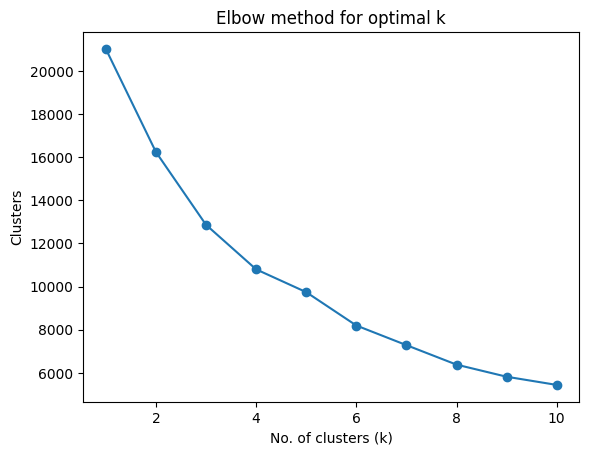

In [ ]:
# Plot using elbow method for optimal k

plt.plot(range(1,11), inertia, marker = 'o')
plt.xlabel('No. of clusters (k)')
plt.ylabel('Clusters')
plt.title('Elbow method for optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

product_per_region['Clusters'] = clusters
cluster_summary = product_per_region.groupby('Clusters')[['Sales', 'Profit', 'Discount', 'Quantity']].mean()
print(cluster_summary)



                Sales       Profit  Discount   Quantity
Clusters                                               
0          748.329491   110.462234  0.311622  12.600144
1         7638.955632  1793.171956  0.403509  12.368421
2          552.488491  -152.831469  1.565377  14.746575
3          187.313057    21.331943  0.184147   4.358098


In [ ]:
# Find clusters with maximum average profit using the index of cluster_summary
profit_clusters_index = cluster_summary['Profit'].idxmax()

# Filter products that belong to those clusters
max_profit_products = product_per_region[product_per_region['Clusters'] == profit_clusters_index]
print("\n Products with Maximum Average Profit Per Region \n", max_profit_products)


 Products with Maximum Average Profit Per Region 
                                                                                 Sales  \
Region  Category        Product Name                                                    
Central Furniture       HON 5400 Series Task Chairs for Big and Tall         6939.702   
        Office Supplies GBC Ibimaster 500 Manual ProClick Binding System    10653.720   
                        Honeywell Enviracaire Portable HEPA Air Cleaner...   3908.450   
                        Ibico EPK-21 Electric Binding System                11339.940   
        Technology      Canon PC1060 Personal Laser Copier                   4899.930   
                        Canon imageCLASS 2200 Advanced Copier               17499.950   
                        Lexmark MX611dhe Monochrome Laser Printer           14279.916   
East    Furniture       DMI Eclipse Executive Suite Bookcases                7214.112   
                        HON 5400 Series Task Chairs for Bi

In [ ]:
# Summary of maximum profitable products

max_profit_summary = max_profit_products.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()
print(max_profit_summary)

     Region                                       Product Name      Profit
0   Central                 Canon PC1060 Personal Laser Copier   2302.9671
1   Central              Canon imageCLASS 2200 Advanced Copier   8399.9760
2   Central   GBC Ibimaster 500 Manual ProClick Binding System   3804.9000
3   Central       HON 5400 Series Task Chairs for Big and Tall    210.2940
4   Central  Honeywell Enviracaire Portable HEPA Air Cleane...   1289.7885
5   Central               Ibico EPK-21 Electric Binding System   1700.9910
6   Central          Lexmark MX611dhe Monochrome Laser Printer  -1189.9930
7      East   3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
8      East                 Adjustable Depth Letter/Legal Cart   1101.4622
9      East                                     Apple iPhone 5   1156.6974
10     East                  Ativa V4110MDD Micro-Cut Shredder   3772.9461
11     East                        Bady BDG101FRU Card Printer   1159.9855
12     East              

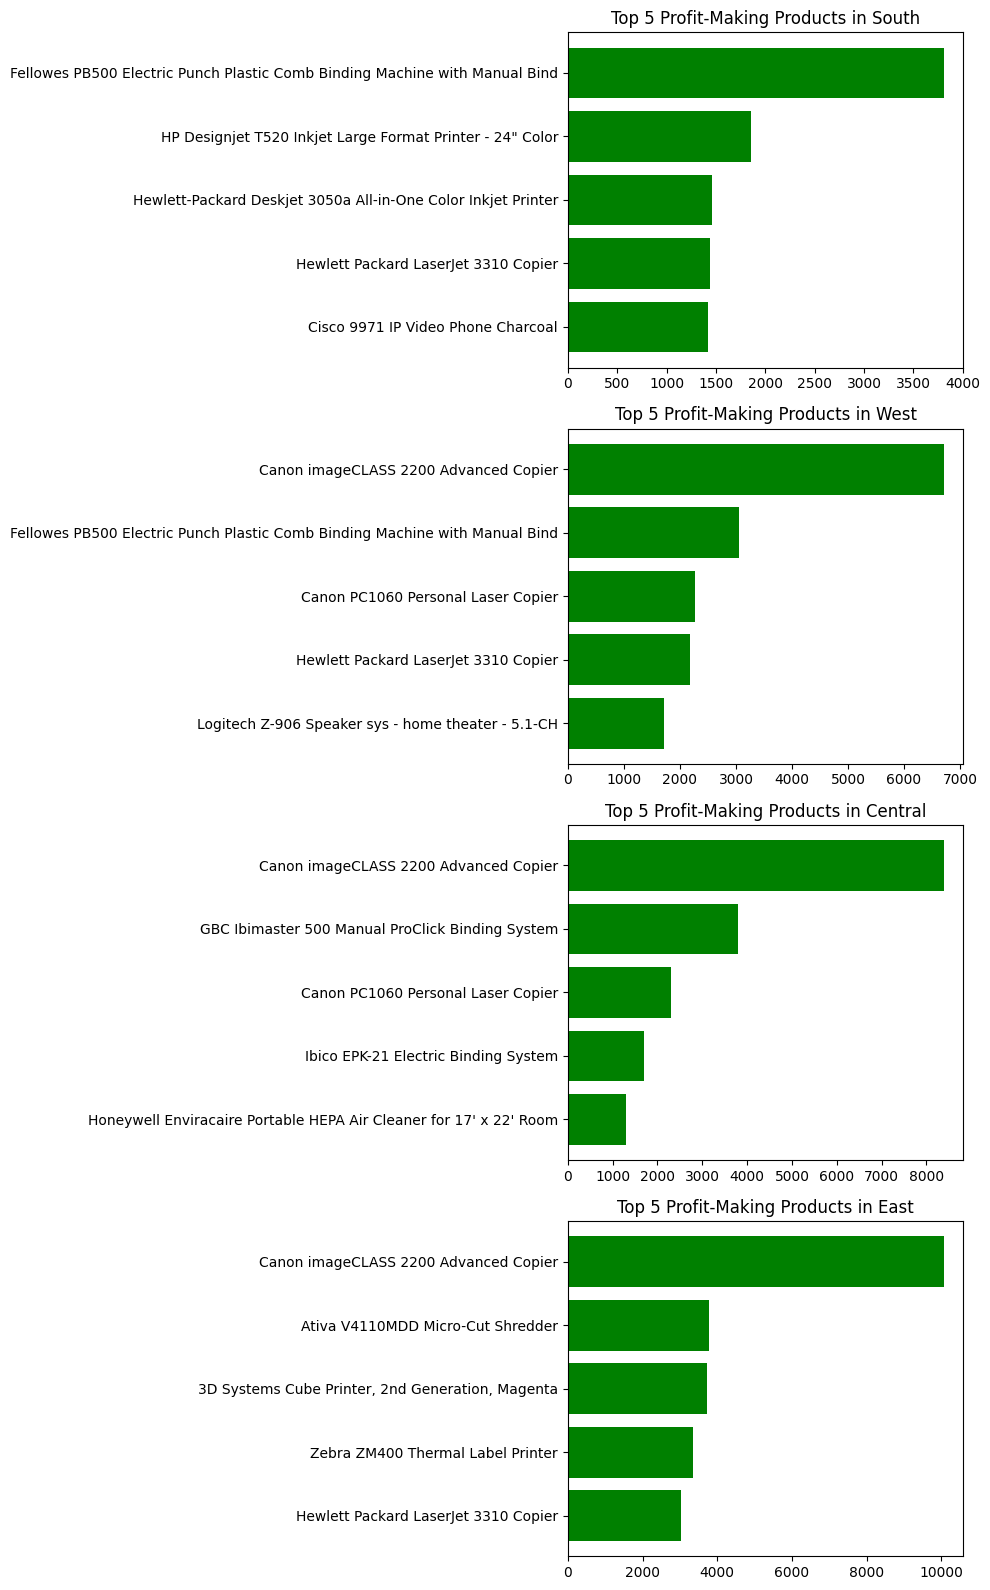

In [ ]:
# Plot the Top 5 profit-making products per region

regions = df['Region'].unique()


fig, axes = plt.subplots(len(regions), 1 , figsize=(10,4*len(regions)))

axes = axes if len(regions)>1 else [axes]

for ax, region in zip(axes, regions):
  regional_data = max_profit_summary[max_profit_summary['Region'] == region].sort_values('Profit', ascending=False).head(5)
  ax.barh(regional_data['Product Name'], regional_data['Profit'], color = 'Green')
  ax.set_title(f"Top 5 Profit-Making Products in {region}")
  ax.invert_yaxis()

plt.tight_layout()
plt.show()

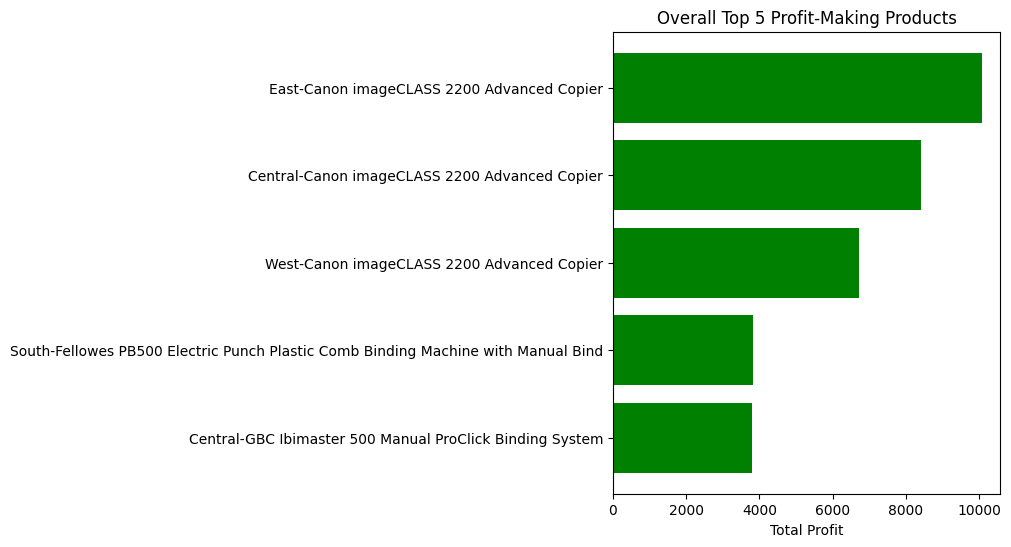

In [ ]:
# Plot the Overall Top 5 Profit-Making Products across the country

max_profit_overall_summary = max_profit_products.sort_values('Profit', ascending= False).head()

plt.figure(figsize=(5,6))
plt.barh(max_profit_overall_summary.index.get_level_values('Region') + '-'+ max_profit_overall_summary.index.get_level_values('Product Name'), max_profit_overall_summary['Profit'], color = 'Green')
plt.xlabel('Total Profit')
plt.title('Overall Top 5 Profit-Making Products')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Find clusters with negative average profit using the index of cluster_summary
loss_clusters_index = cluster_summary['Profit'].idxmin()

# Filter products that belong to those clusters
loss_products = product_per_region[product_per_region['Clusters'] == loss_clusters_index]
print(loss_products)

                                                                               Sales  \
Region  Category        Product Name                                                   
Central Furniture       12-1/2 Diameter Round Wall Clock                      87.912   
                        36X48 HARDFLOOR CHAIRMAT                              41.960   
                        Atlantic Metals Mobile 5-Shelf Bookcases, Custo...  3069.996   
                        BPI Conference Tables                                511.175   
                        Chromcraft Bull-Nose Wood Round Conference Tabl...  1829.940   
...                                                                              ...   
West    Office Supplies Wilson Jones Impact Binders                           56.980   
                        Wilson Jones Leather-Like Binders with DublLock...   168.489   
        Technology      Lexmark MX611dhe Monochrome Laser Printer           2549.985   
                        Panasoni

In [ ]:
# Summary of negative profitable products

loss_summary = loss_products.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()
print(loss_summary)

      Region                                       Product Name     Profit
0    Central                   12-1/2 Diameter Round Wall Clock   -52.7472
1    Central  3.6 Cubic Foot Counter Height Office Refrigerator -1378.8216
2    Central                           36X48 HARDFLOOR CHAIRMAT   -55.5970
3    Central   APC 7 Outlet Network SurgeArrest Surge Protector  -241.4400
4    Central  Acco 6 Outlet Guardian Premium Plus Surge Supp...  -135.0184
..       ...                                                ...        ...
287     West         Wilson Jones Custom Binder Spines & Labels    -5.9840
288     West            Wilson Jones Easy Flow II Sheet Lifters     3.9600
289     West                        Wilson Jones Impact Binders    17.3530
290     West  Wilson Jones Leather-Like Binders with DublLoc...    48.1896
291     West                 netTALK DUO VoIP Telephone Service   314.9400

[292 rows x 3 columns]


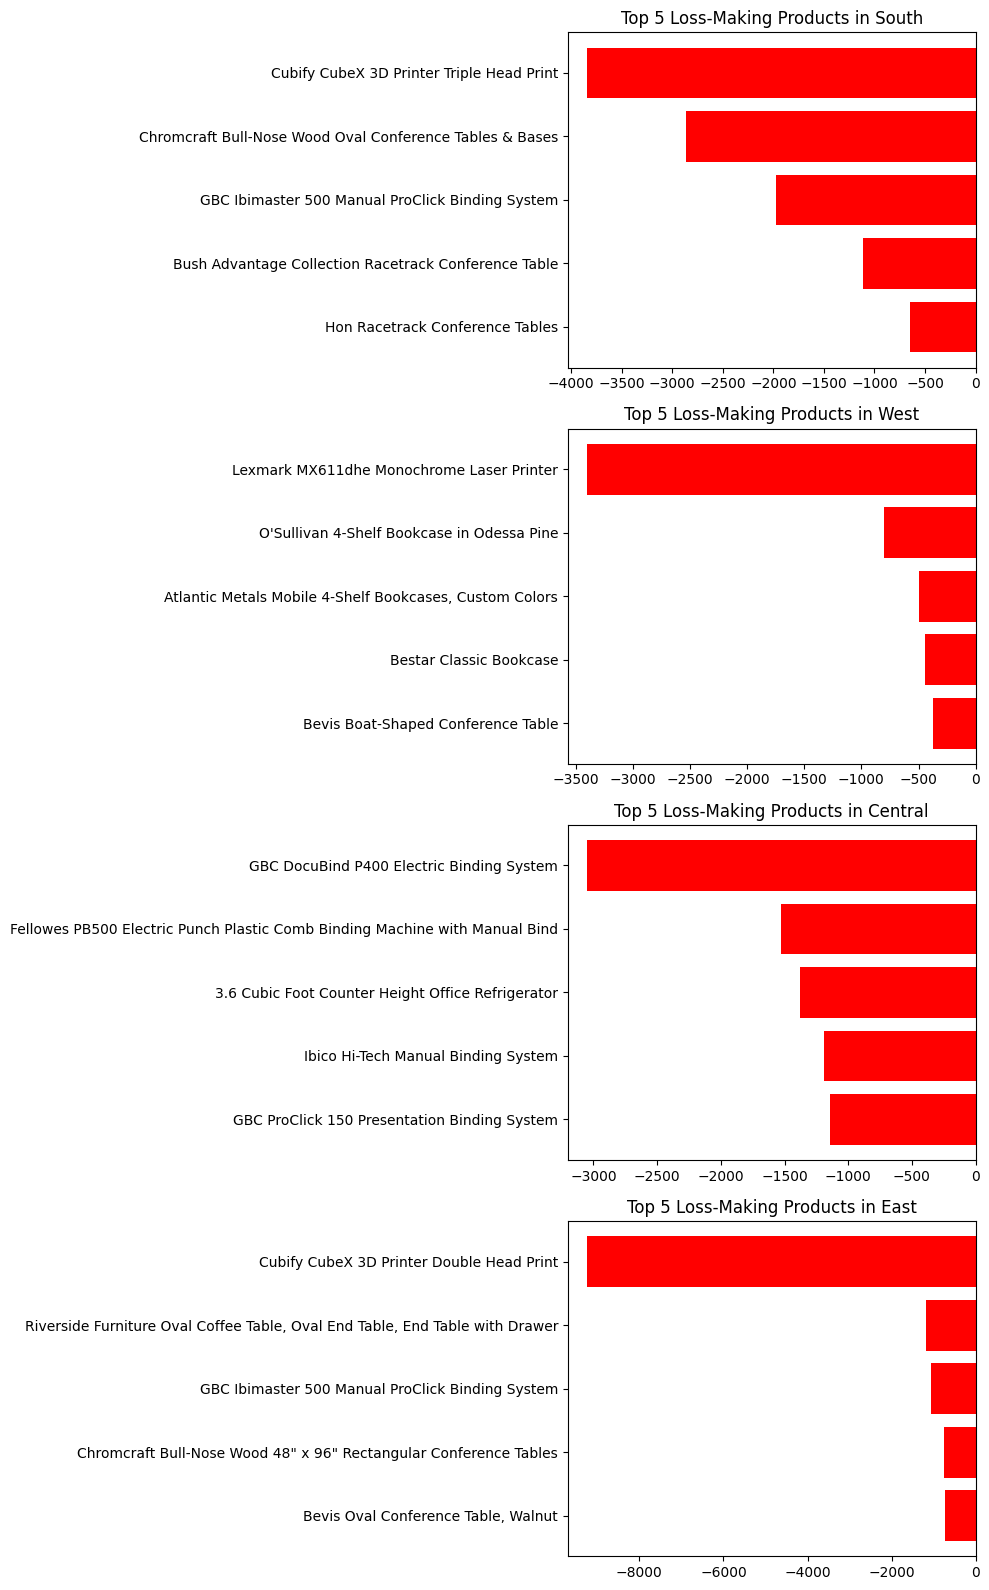

In [ ]:
# Plot the Top 5 loss-making products per region

fig, axes = plt.subplots(len(regions), 1, figsize = (10, 4*len(regions)))

axes = axes if len(regions)>1 else [axes]

for ax, region in zip(axes, regions):
  regional_data = loss_summary[loss_summary['Region'] == region].sort_values('Profit').head()
  ax.barh(regional_data['Product Name'], regional_data['Profit'], color = 'Red')
  ax.set_title(f'Top 5 Loss-Making Products in {region}')
  ax.invert_yaxis()

plt.tight_layout()
plt.show()


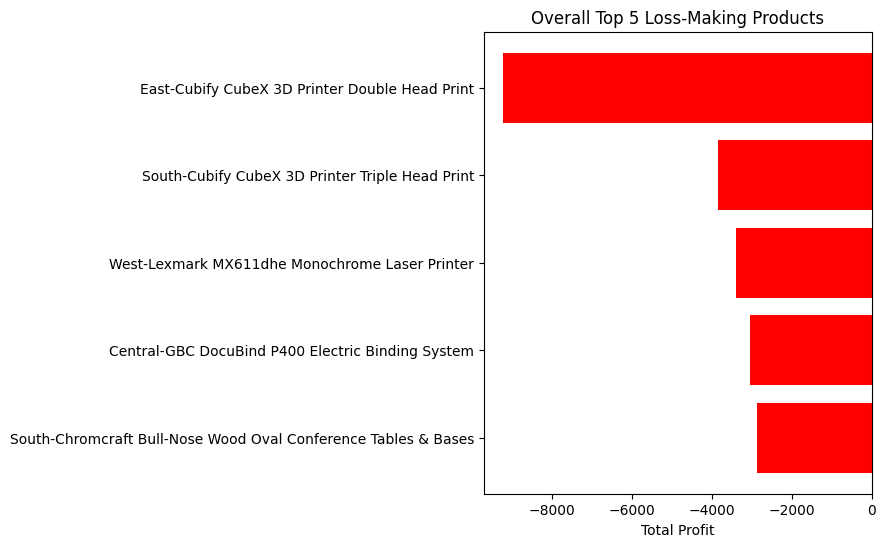

In [ ]:
# Plotting Overall Top 5 Loss-Making Products across the country

loss_overall_summary = loss_products.sort_values('Profit').head()

plt.figure(figsize=(5,6))
plt.barh(loss_overall_summary.index.get_level_values('Region')+ '-'+ loss_overall_summary.index.get_level_values('Product Name'), loss_overall_summary['Profit'], color = 'Red')
plt.xlabel('Total Profit')
plt.title('Overall Top 5 Loss-Making Products')
plt.gca().invert_yaxis()
plt.show()

                   Profit per Unit  Discounted Sales  Profit Margin  \
Profit per Unit           1.000000          0.580837       0.240215   
Discounted Sales          0.580837          1.000000       0.043816   
Profit Margin             0.240215          0.043816       1.000000   
Sales per Unit            0.538217          0.872183       0.007044   
Quantity Discount        -0.194550         -0.024842      -0.702435   
Sales Discount           -0.209161          0.401281      -0.130908   
Profit                    0.912199          0.632732       0.223732   

                   Sales per Unit  Quantity Discount  Sales Discount    Profit  
Profit per Unit          0.538217          -0.194550       -0.209161  0.912199  
Discounted Sales         0.872183          -0.024842        0.401281  0.632732  
Profit Margin            0.007044          -0.702435       -0.130908  0.223732  
Sales per Unit           1.000000          -0.028481        0.513050  0.468312  
Quantity Discount       -0

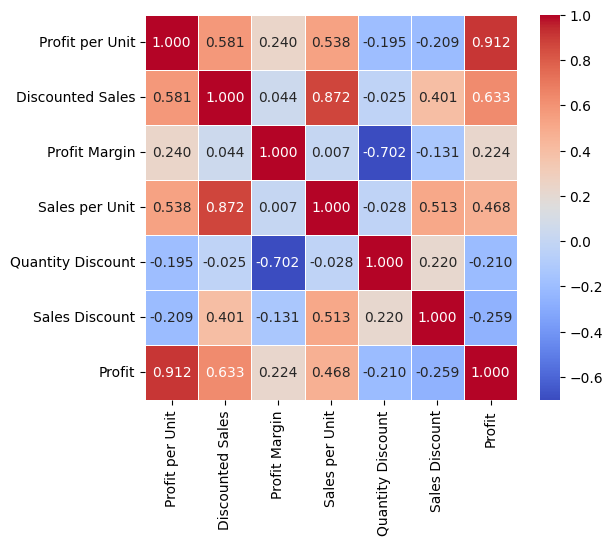

In [ ]:
# Feature engineering

df['Profit Margin'] = df['Profit']/df['Sales'] #Profit Margin a better indicator for profit
df['Discounted Sales'] = df['Sales']*(1-df['Discount'])
df['Profit per Unit'] = df['Profit'] / df['Quantity']
df['Sales per Unit'] = df['Sales']/df['Quantity']
df['Sales Discount'] = df['Sales']* df['Discount']
df['Quantity Discount'] = df['Quantity']* df['Discount']

c = df[['Profit per Unit', 'Discounted Sales', 'Profit Margin','Sales per Unit','Quantity Discount', 'Sales Discount', 'Profit']]
print(c.corr())

plt.figure(figsize=(6,5))
sns.heatmap(c.corr(), annot = True, cmap = 'coolwarm', fmt='.3f', linewidths=0.5, cbar=True )
plt.show()

In [ ]:
# Supervised ml regression algorithm
X1 = df[['Discount', 'Profit Margin','Profit per Unit', 'Discounted Sales', 'Sales per Unit', 'Region', 'Category', 'Sub-Category','Quantity Discount', 'Sales Discount' ]]
y = df['Profit']

# Train and Test the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state= 42)

# Preprocessing
numeric_features = ['Discount', 'Profit per Unit', 'Discounted Sales', 'Sales per Unit', 'Profit Margin', 'Quantity Discount', 'Sales Discount']
categorical_features = ['Region', 'Category', 'Sub-Category']

# Scale numbers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Encode categories using Onehotencoder
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features) ])

In [ ]:
# Linear Regression Model

model1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
#

model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

print("R^2:", r2_score(y_test, y_pred1))
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

R^2: 0.8443175271089369
MAE: 26.413264405112542
RMSE: 91.27636273310502


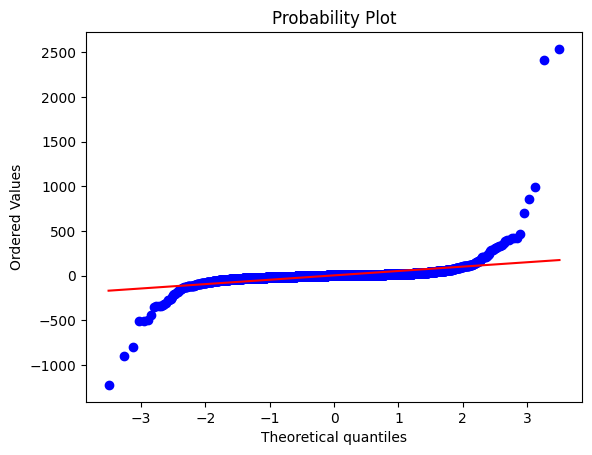

In [ ]:
residuals = y_test - y_pred1
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [ ]:
# Random Forest Regression Model

model2 = Pipeline(steps =[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state = 42))] )
param_grid = {'regressor__max_depth': range(1,21)}
cv = KFold(n_splits=5, shuffle = True, random_state= 42)

grid = GridSearchCV(model2, param_grid, cv = cv, scoring= 'neg_mean_squared_error', n_jobs = -1)

grid.fit(X_train, y_train)
print("Best max_depth:", grid.best_params_['regressor__max_depth'])

Best max_depth: 16


In [ ]:
best_max_depth = grid.best_params_['regressor__max_depth']
model2 = Pipeline(steps =[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state = 42, max_depth=best_max_depth ))])
# Train model
model2.fit(X_train, y_train)
# Predict
y_pred2 = model2.predict(X_test)

# Evaluation
print("R^2:", r2_score(y_test, y_pred2))
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))

R^2: 0.761671566218642
MAE: 9.714458282032473
RMSE: 112.93443783102603


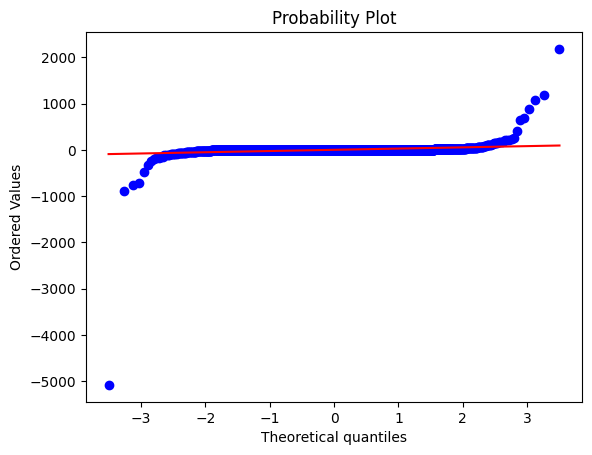

In [ ]:
residuals = y_test -  y_pred2
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [ ]:
# Decision Tree Regression Model

model3 = Pipeline(steps=[('preprocessor', preprocessor),('regressor', DecisionTreeRegressor(random_state=42))])
param_grid = {'regressor__max_depth': range(1,21)}
cv = KFold(n_splits=5, shuffle = True, random_state= 42)

grid = GridSearchCV(model3, param_grid, cv = cv, scoring= 'neg_mean_squared_error', n_jobs = -1)

grid.fit(X_train, y_train)
best_max_depth = grid.best_params_['regressor__max_depth']
print("Best max_depth:",best_max_depth)

Best max_depth: 20


In [ ]:
model3 = Pipeline(steps=[('preprocessor', preprocessor),('regressor', DecisionTreeRegressor(random_state=42, max_depth=best_max_depth))])
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

# Evaluation
print("R^2:", r2_score(y_test, y_pred3))
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred3)))



R^2: 0.5849709121623036
MAE: 12.514328502129048
RMSE: 149.03138338260618


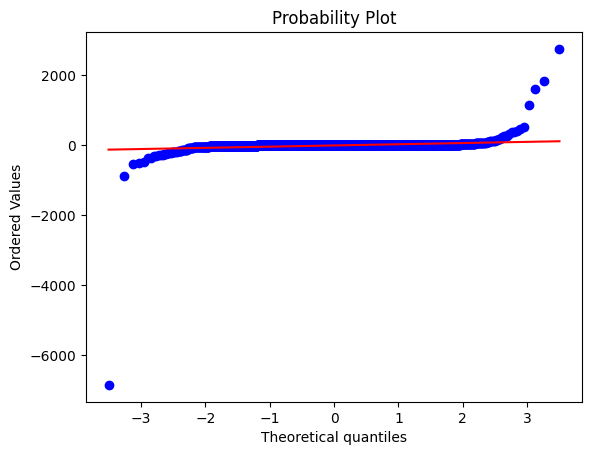

In [ ]:
residuals = y_test -  y_pred3
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()